## **AbleTech- Automated Visual Quality Inspection**

This notebook implements the state of art custom object detection model `tiny yolo-v3` for detecting the defects in a screw.
  
Just Follow the notebook to train any of your own data set using tiny yolo with darknet.  

# Configuring cuDNN on Colab for our Detector


In [ ]:
# Let's check that Nvidia CUDA drivers are already pre-installed and which version is it.
!/usr/local/cuda/bin/nvcc --version
# We need to install the correct cuDNN according to this output

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
#take a look at the kind of GPU we have
!nvidia-smi

Wed Nov 11 13:05:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Change the number depending on what GPU is listed above, under NVIDIA-SMI > Name.
# Tesla K80: 30
# Tesla P100: 60
# Tesla T4: 75
%env compute_capability=75

env: compute_capability=75


# Installing Darknet for our Yolo-V3




In [ ]:
%cd /content/
%rm -rf darknet

/content


In [ ]:
#we clone the fork of darknet maintained by roboflow
!git clone https://github.com/roboflow-ai/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 13289, done.
remote: Total 13289 (delta 0), reused 0 (delta 0), pack-reused 13289
Receiving objects: 100% (13289/13289), 12.13 MiB | 23.97 MiB/s, done.
Resolving deltas: 100% (9106/9106), done.


**IMPORTANT! Change the 2md last line of the cell below according to your GPU kind**

In [ ]:
%cd darknet/

!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile

!sed -i 's/GPU=0/GPU=1/g' Makefile

!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

!sed -i "s/ARCH= -gencode arch=compute_60,code=sm_60/ARCH= -gencode arch=compute_75,code=sm_75/g" Makefile

!make 

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variabl

In [ ]:
#download the newly released yolov3-tiny weights
%cd /content/darknet
!wget https://pjreddie.com/media/files/yolov3-tiny.weights
#!wget  http://pjreddie.com/media/files/darknet53.conv.74

/content/darknet
--2020-11-11 13:20:09--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M   208KB/s    in 2m 23s  

2020-11-11 13:22:34 (241 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]


# Set up Custom Dataset for YOLOv3

We have used Roboflow to convert our dataset from any format to the YOLO Darknet format. THe cell below contains a code for dataset to directly download from roboflow. Please dont share this with anyone else.

In [ ]:
%cd /content/darknet
!curl -L "https://app.roboflow.com/ds/Ia3W3fhc9w?key=96SPhAT6bZ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/darknet
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   890  100   890    0     0   1097      0 --:--:-- --:--:-- --:--:--  1096
100 8894k  100 8894k    0     0  8243k      0  0:00:01  0:00:01 --:--:-- 8243k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_darknet.labels    
 extracting: test/good18-usman_jpeg.rf.38e72dfceac8647518492cdbad62a250.jpg  
 extracting: test/good18-usman_jpeg.rf.38e72dfceac8647518492cdbad62a250.txt  
 extracting: test/good2-usman_jpeg.rf.9f005534764e66e9d2c545d3c21d0272.jpg  
 extracting: test/good2-usman_jpeg.rf.9f005534764e66e9d2c545d3c21d0272.txt  
 extracting: test/good8-usman_jpeg.rf.1cf2f624483c6cf44c44a238d9c32da1.jpg  
 extracting: test/good8-usman_jpeg.rf.1cf2f624483c6cf44c44a238d9c32da1.txt  
 extracting: test/threaded-side-front-18-usm_jpeg.rf.7f84b597314bdbaa4cd56337531fa51a

In [ ]:
#Set up training file directories for custom dataset
%cd /content/darknet/
%cp train/_darknet.labels data/obj.names
%mkdir data/obj
#copy image and labels
%cp train/*.jpg data/obj/
%cp valid/*.jpg data/obj/

%cp train/*.txt data/obj/
%cp valid/*.txt data/obj/

with open('data/obj.data', 'w') as out:
  out.write('classes = 3\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = backup/')

#write train file (just the image list)
import os

with open('data/train.txt', 'w') as out:
  for img in [f for f in os.listdir('train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir('valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

/content/darknet


# Write Custom Training Config for YOLOv3

In [ ]:
#we build config dynamically based on number of classes
#we build iteratively from base config files. This is the same file shape as cfg/yolo-obj.cfg
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_darknet.labels')
max_batches = num_classes * 3000
steps1 = .8 * max_batches
steps2 = .9 * max_batches
steps_str = str(steps1)+','+str(steps2)
num_filters = (num_classes + 5) * 3


print("writing config for a custom YOLOv3 detector detecting number of classes: " + str(num_classes))

#Instructions from the darknet repo
#change line max_batches to (classes*2000 but not less than number of training images, and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
#change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
if os.path.exists('./cfg/custom-yolov3-tiny-detector.cfg'): os.remove('./cfg/custom-yolov3-tiny-detector.cfg')


#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

writing config for a custom YOLOv3 detector detecting number of classes: 4


In [ ]:
!./darknet detector calc_anchors data/obj.data -num_of_clusters 9 -width 416 -height 416 -show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0

 num_of_clusters = 9, width = 416, height = 416 
 read labels from 141 images 
 loaded 	 image: 141 	 box: 138
 all loaded. 

 calculating k-means++ ...

 iterations = 9 


counters_per_class = 69, 21, 39, 9

 avg IoU = 85.35 % 

Saving anchors to the file: anchors.txt 
anchors = 103,257, 196,141, 273,111, 327,139, 165,310, 285,192, 225,244, 322,257, 317,336
Unable to init server: Could not connect: Connection refused

(clusters:830): Gtk-WARNING **: 13:24:45.074: cannot open display: 


In [ ]:
%%writetemplate ./cfg/custom-yolov3-tiny-detector.cfg
[net]
# Testing
#batch=64
#subdivisions=1
# Training
batch=64
subdivisions=24
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=1000
max_batches = {max_batches}
policy=steps
steps={steps_str}
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filters=1024
size=3
stride=1
pad=1
activation=leaky

###########

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear



[yolo]
mask = 3,4,5
anchors = 2,  2, 242,404, 402,267, 319,407, 404,325, 358,394, 406,364, 386,412, 413,411
classes=4
num=6
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1

[route]
layers = -4

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = -1, 8

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[yolo]
mask = 0,1,2
anchors = 2,  2, 242,404, 402,267, 319,407, 404,325, 358,394, 406,364, 386,412, 413,411
classes=4
num=6
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1

In [ ]:
# viewing our custom configuration file
%cat cfg/custom-yolov3-tiny-detector.cfg

[net]
# Testing
#batch=64
#subdivisions=1
# Training
batch=64
subdivisions=24
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=1000
max_batches = 12000
policy=steps
steps=9600.0,10800.0
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filt

# Train Custom YOLOv4 Detector

In [ ]:
#lets start training with yolo-v3's backbone weights and our custom configuration
!./darknet detector train data/obj.data cfg/custom-yolov3-tiny-detector.cfg -dont_show -ext_output -map


Streaming output truncated to the last 5000 lines.
 Last accuracy mAP@0.5 = 70.97 %, best = 72.22 % 
 11132: 0.170841, 0.105907 avg loss, 0.000026 rate, 0.980670 seconds, 534336 images, 0.205891 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 11200 iterations) 
 Last accuracy mAP@0.5 = 70.97 %, best = 72.22 % 
 11133: 0.105698, 0.105886 avg loss, 0.000026 rate, 0.979662 seconds, 534384 images, 0.206197 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 11200 iterations) 
 Last accuracy mAP@0.5 = 70.97 %, best = 72.22 % 
 11134: 0.143289, 0.109627 avg loss, 0.000026 rate, 0.981403 seconds, 534432 images, 0.206494 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 11200 iterations) 
 Last accuracy mAP@0.5 = 70.97 %, best = 72.22 % 
 11135: 0.194445, 0.118109 avg loss, 0.000026 rate, 1.023834 seconds, 534480 images, 0.206790 hours left
Loaded: 0.000039 seconds

 (next mAP calculation at 11200 iterations) 
 Last accuracy mAP@0.5 = 70.97 %, best = 72.2

# Infer Custom Objects with Saved YOLOv3 Weights

In [ ]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
#check if weigths have saved yet
#backup houses the last weights for our detector
#(file yolo-obj_last.weights will be saved to the build\darknet\x64\backup\ for each 100 iterations)
#(file yolo-obj_xxxx.weights will be saved to the build\darknet\x64\backup\ for each 1000 iterations)
#After training is complete - get result yolo-obj_final.weights from path build\darknet\x64\bac
!ls backup
#if it is empty you haven't trained for long enough yet, you need to train for at least 100 iterations

custom-yolov3-tiny-detector_10000.weights
custom-yolov3-tiny-detector_1000.weights
custom-yolov3-tiny-detector_11000.weights
custom-yolov3-tiny-detector_12000.weights
custom-yolov3-tiny-detector_2000.weights
custom-yolov3-tiny-detector_3000.weights
custom-yolov3-tiny-detector_4000.weights
custom-yolov3-tiny-detector_5000.weights
custom-yolov3-tiny-detector_6000.weights
custom-yolov3-tiny-detector_7000.weights
custom-yolov3-tiny-detector_8000.weights
custom-yolov3-tiny-detector_9000.weights
custom-yolov3-tiny-detector_best.weights
custom-yolov3-tiny-detector_final.weights
custom-yolov3-tiny-detector_last.weights


In [ ]:
#coco.names is hardcoded somewhere in the detector
%cp data/obj.names data/coco.names

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 24, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 m

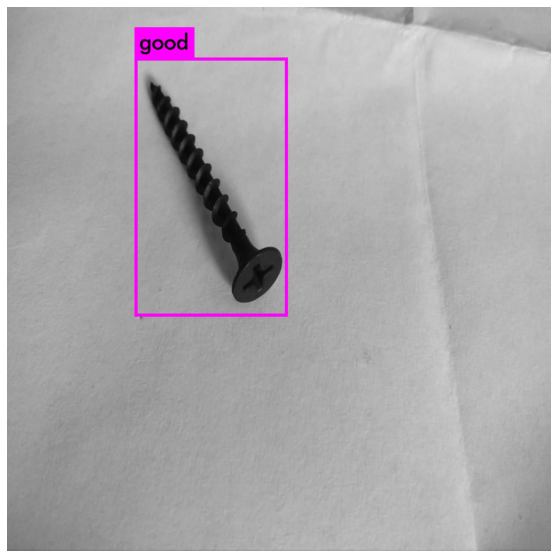

In [ ]:

#/test has images that we can test our detector on
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

#test out our detector!
!./darknet detect cfg/custom-yolov3-tiny-detector.cfg backup/custom-yolov3-tiny-detector_best.weights {img_path} -dont-show
imShow('predictions.jpg')

#### Finally download the best weights, cfg file and coco.names to use it locally.